### this program uses an artificial recurrent neural network called Long Short Term Memory(LSTM) to predict the closing stock price of a corporation ( Apple Inc.) using the past 60 dya stock price.

In [11]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2012-01-03  14.732143  14.607143  14.621429  14.686786  302220800.0  12.650659
2012-01-04  14.810000  14.617143  14.642857  14.765714  260022000.0  12.718646
2012-01-05  14.948214  14.738214  14.819643  14.929643  271269600.0  12.859850
2012-01-06  15.098214  14.972143  14.991786  15.085714  318292800.0  12.994284
2012-01-09  15.276786  15.048214  15.196429  15.061786  394024400.0  12.973674
...               ...        ...        ...        ...          ...        ...
2019-12-11  67.775002  67.125000  67.202499  67.692497   78756800.0  67.012764
2019-12-12  68.139999  66.830002  66.945000  67.864998  137310400.0  67.183548
2019-12-13  68.824997  67.732498  67.864998  68.787498  133587600.0  68.096771
2019-12-16  70.197502  69.245003  69.250000  69.964996  128186000.0  69.262459
2019-12-17  70.442497  69.699997  69.892502  70.1025

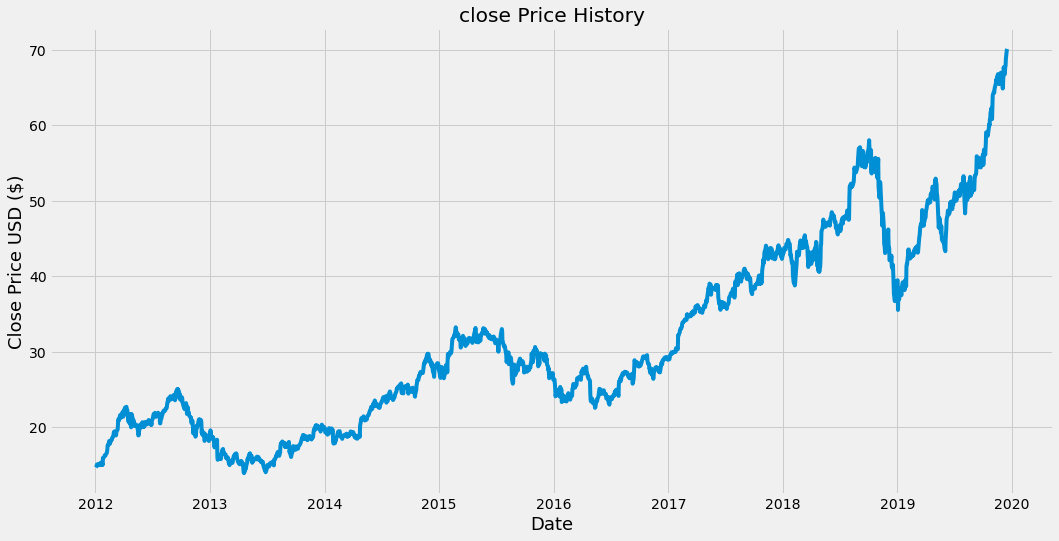

In [2]:
df = web.DataReader("AAPL", data_source = "yahoo", start = "2012-01-01", end = "2019-12-17")
print(df)

# Get the number of rows and columns in the data set
df.shape

#Visualize the closing price history
plt.figure(figsize = (16, 8))
plt.title("close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18)
plt.show()

In [3]:
#Create a new dataframe with only the "close column"
data = df.filter(["Close"])
# convert the dataframe to a numpy array
dataset = data.values
# Get the number of row to train the model on
training_data_len = math.ceil(len(dataset) * .8)
print(training_data_len)

1603


In [25]:
data

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2019-12-11,67.692497
2019-12-12,67.864998
2019-12-13,68.787498


In [5]:
dataset

array([[14.6867857 ],
       [14.76571369],
       [14.92964268],
       ...,
       [68.78749847],
       [69.96499634],
       [70.10250092]])

In [4]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [6]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
print(len(train_data))
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print()
        print(y_train)
        print()

1603
[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]

[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172

In [7]:
# Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [12]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
# Compile the model
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [17]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1543/1543 [==============================] - 23s 13ms/step - loss: 9.2165e-04


In [18]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
# Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [19]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [20]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [22]:
# Get teh root mena squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.0377951049804688

C:\Riot Games\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


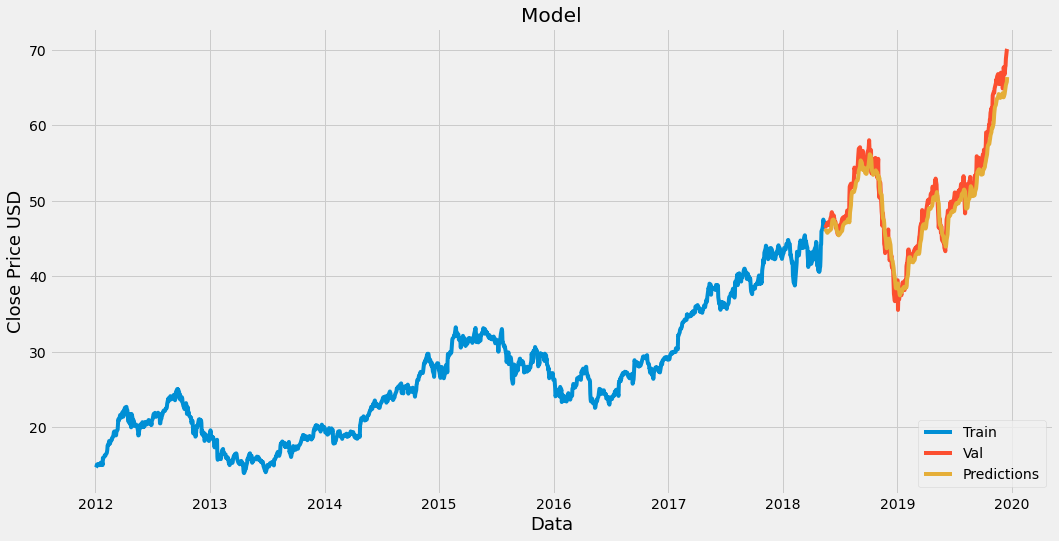

In [24]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
# Visualize the data
plt.figure(figsize =(16, 8))
plt.title("Model")
plt.xlabel("Data", fontsize = 18)
plt.ylabel("Close Price USD", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

In [82]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,42.487579
2018-05-18,46.577499,42.558025
2018-05-21,46.907501,42.571728
2018-05-22,46.790001,42.583481
2018-05-23,47.090000,42.582119
...,...,...
2019-12-11,67.692497,58.015163
2019-12-12,67.864998,58.184601
2019-12-13,68.787498,58.369984


In [84]:
# Get the quote
apple_quote = web.DataReader("AAPL", data_source = "yahoo", start = "2012-01-01", end = "2019-12-17")
# Create a new dataframe
new_df = apple_quote.filter(["Close"])
# Get the last 60 day closing price values and convert the dataframe to the array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create and empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the  X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicdted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[59.358463]]


In [85]:
# Get the quote
apple_quote2 = web.DataReader("AAPL", data_source = "yahoo", start = "2012-01-01", end = "2019-12-17")
print(apple_quote2["Close"])

Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
Name: Close, Length: 2003, dtype: float64
